In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

# Read the CSV 

In [2]:
data = pd.read_csv('resources/data.csv').drop(columns='Unnamed: 0')


In [4]:
target = data['target']
target_names = ['Like', 'Dislike']

# Create a Train Test Split



In [5]:
from sklearn.model_selection import train_test_split
y = data["target"]
X = data.drop(columns=["target", "song_title", "artist"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

50.57% of the values are target of 1


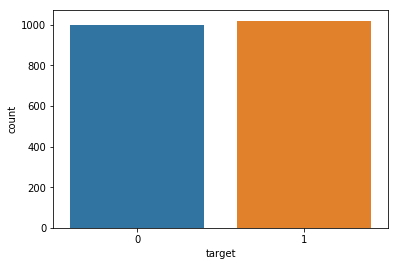

In [91]:
import seaborn as sns
#Just to get a sense of how well "balanced" this problem is
sns.countplot(x='target', data=data)

proportion_which_are_target_of_1 = (data['target']==1).sum() / len(data['target']) 

print(f'{proportion_which_are_target_of_1 * 100:.2f}% of the values are target of 1')

In [96]:
#notice your stratification worked pretty well,
# the proportion of values which are "1", in the test data set, 
test_proportion_which_are_target_of_1 = (y_test==1).sum() / len(y_test) 

print(f'{test_proportion_which_are_target_of_1 * 100:.2f}% of the test values are target of 1')

train_proportion_which_are_target_of_1 = (y_train==1).sum() / len(y_train) 

print(f'{train_proportion_which_are_target_of_1 * 100:.2f}% of the train values are target of 1')

50.50% of the test values are target of 1
50.60% of the train values are target of 1


# Visualize the Support Vector Machine

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


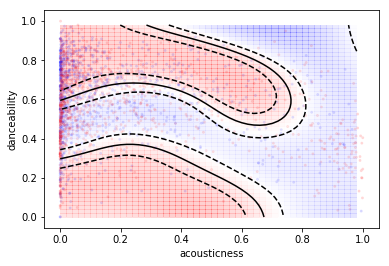

The two-feature SVC classifier , for features of acousticness, and danceability, with a gamma of 10, scores 0.6237623762376238


,actual,predicted
390,1,1
762,1,1
1603,0,0
996,1,1
1436,0,0
1336,0,0
1404,0,1
1568,0,0
1063,0,1
1486,0,0


In [60]:

def show_svc_lines_and_scores(
    first_feature = 'acousticness',
    second_feature = 'danceability',
    gamma = 10,
    C = 5):
    # y = data["target"]
    # X = data.drop(columns=["target", "song_title", "artist"])
    X_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

    clf=SVC(kernel='rbf', C=C, gamma=gamma)

    clf_X_train, clf_X_test, clf_y_train, clf_y_test = train_test_split(X_scaled[[first_feature, second_feature]], y, random_state=1, stratify=y)
    clf.fit(clf_X_train, clf_y_train)
    # clf.predict(clf_X_test)
    # clf.score(clf_X_test, clf_y_test)
    clf.predict(clf_X_test)
    # plt.scatter(clf_X_test[first_feature], clf_X_test[second_feature], c=clf_y_test)

    plt.scatter(X_scaled[first_feature], X_scaled[second_feature], c=(1-y), cmap='bwr',alpha=0.1, s=4)
    x_min = X_scaled[first_feature].min()
    x_max = X_scaled[first_feature].max()
    y_min = X_scaled[second_feature].min()
    y_max = X_scaled[second_feature].max()

    XX, YY = np.mgrid[x_min:x_max:(x_max-x_min)/50, y_min:y_max:(y_max-y_min)/50]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z , cmap='bwr', alpha=0.2)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                 linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.xlabel(first_feature)
    plt.ylabel(second_feature)
    plt.show()
    print(f'The two-feature SVC classifier , for features of {first_feature}, and {second_feature}, with a gamma of {gamma}, scores {clf.score(clf_X_test, clf_y_test)}')

    df = pd.DataFrame({
    'actual': clf_y_test,
    'predicted': clf.predict(clf_X_test)
    })
    
    return df
    
show_svc_lines_and_scores().head(10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


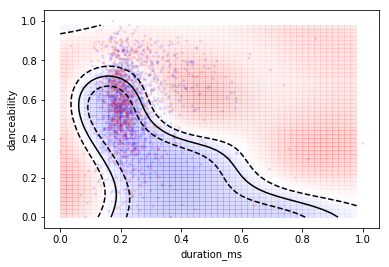

The two-feature SVC classifier , for features of duration_ms, and danceability, with a gamma of 10, scores 0.6336633663366337


,actual,predicted
390,1,0
762,1,0
1603,0,1
996,1,1
1436,0,1
1336,0,0
1404,0,0
1568,0,0
1063,0,0
1486,0,0


In [64]:
show_svc_lines_and_scores('duration_ms', 'danceability').head(10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


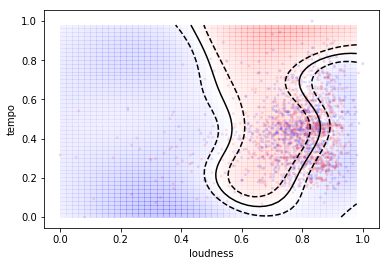

The two-feature SVC classifier , for features of loudness, and tempo, with a gamma of 10, scores 0.6594059405940594


,actual,predicted
390,1,0
762,1,1
1603,0,0
996,1,1
1436,0,0
1336,0,0
1404,0,1
1568,0,0
1063,0,1
1486,0,0


In [65]:
show_svc_lines_and_scores('loudness', 'tempo').head(10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


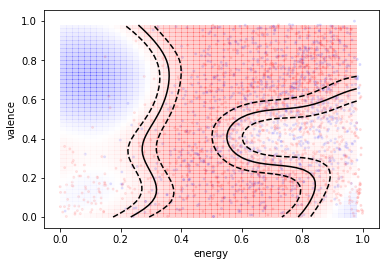

The two-feature SVC classifier , for features of energy, and valence, with a gamma of 10, scores 0.5425742574257426


,actual,predicted
390,1,0
762,1,1
1603,0,0
996,1,1
1436,0,0
1336,0,0
1404,0,1
1568,0,0
1063,0,1
1486,0,0


In [66]:
show_svc_lines_and_scores('energy', 'valence').head(10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


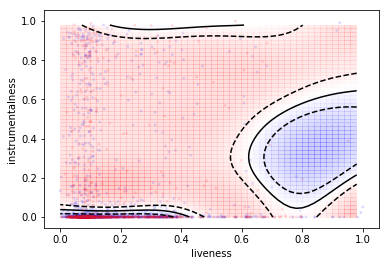

The two-feature SVC classifier , for features of liveness, and instrumentalness, with a gamma of 10, scores 0.5762376237623762


,actual,predicted
390,1,0
762,1,1
1603,0,1
996,1,1
1436,0,1
1336,0,1
1404,0,0
1568,0,1
1063,0,0
1486,0,0


In [67]:
show_svc_lines_and_scores('liveness', 'instrumentalness').head(10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


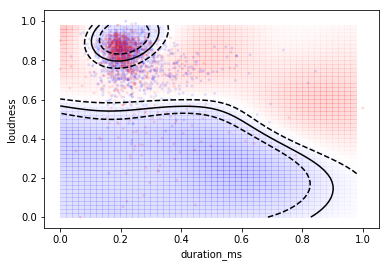

The two-feature SVC classifier , for features of duration_ms, and loudness, with a gamma of 10, scores 0.6574257425742575


,actual,predicted
390,1,0
762,1,1
1603,0,0
996,1,1
1436,0,1
1336,0,0
1404,0,1
1568,0,0
1063,0,1
1486,0,0


In [72]:
show_svc_lines_and_scores('duration_ms', 'loudness').head(10)